<a href="https://colab.research.google.com/github/dongjun0001/Coding-Test-Prep/blob/main/%08Value_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import finterstellar as fs

In [4]:
otp = '16540600241121001065'

In [5]:
df = fs.fn_single(otp=otp, symbol='COST',window='T')
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,Shares,...,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Capital Expenditure,Investing cash flow,Dividends,Financing cash flow,Price
2022-02-28,2.102190e+11,1.836170e+11,2.660200e+10,1.911400e+10,7.443000e+09,5.513000e+09,12.41,9.549000e+09,7.443000e+09,444000000.0,...,1.155700e+10,4.310200e+10,1.941800e+10,2.071000e+09,9.932000e+09,-3.900000e+09,-3.891000e+09,-1.358000e+09,-2.805000e+09,519.25
2022-04-30,2.175380e+11,1.905570e+11,2.698100e+10,1.937500e+10,7.571000e+09,5.646000e+09,12.70,7.484000e+09,7.571000e+09,444000000.0,...,1.149400e+10,4.333900e+10,1.996800e+10,1.669000e+09,6.599000e+09,-2.872000e+09,-2.548000e+09,-6.980000e+08,-2.386000e+09,531.72
2022-05-31,2.074590e+11,1.821790e+11,2.528000e+10,1.819300e+10,7.087000e+09,5.329000e+09,8.94,4.518000e+09,7.087000e+09,443700000.0,...,1.149400e+10,4.333900e+10,2.051300e+10,1.013000e+09,3.659000e+09,-1.778000e+09,-1.393000e+09,3.500000e+08,-1.667000e+09,466.22


In [6]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

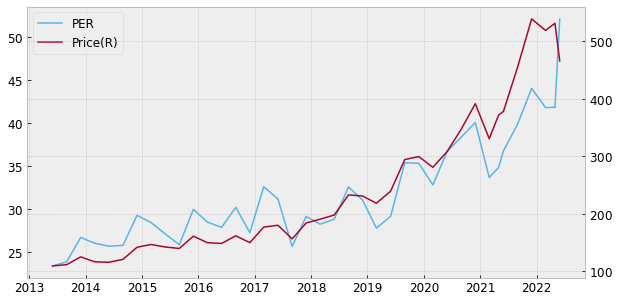

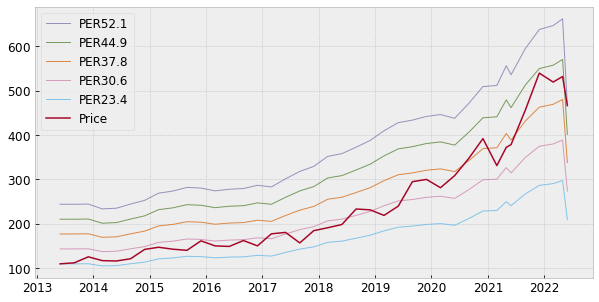

In [7]:
# PER = Price / EPS
df['PER'] = df['Price']/df['EPS']
fs.draw_chart(df,left='PER',right='Price')
# param acct: Financial account to be used to calculate price multiple
fs.draw_price_multiple_band(df,multiple='PER',acct='EPS')

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 57.94%
Accumulated return: 57.94%
Investment period: 1.0yrs
Sharpe ratio: 1.31
MDD: -12.76%


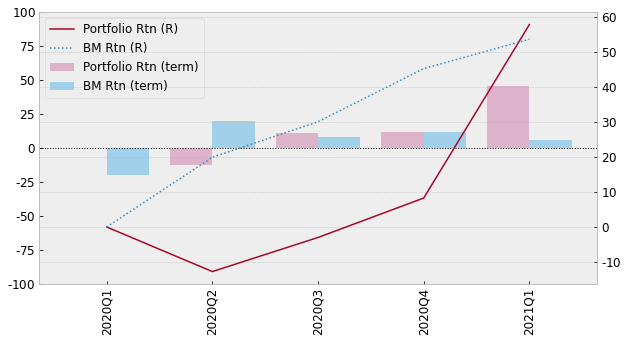

In [8]:
#PER (Price Earning Ratio)
#Strategy: Trade Top 30 Low PER stocks

#set_terms()
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')

#fs.fn_single(): get only one stock's financial data
#fs.fn_consolidate(): get all stock's financial data
#for loop
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

#fs.fn_filter(): Filter stock by criteria and save in s[t]
#floor: minimum, cap:maximum, n: number of stocks, asc=True: ascending order
#signal[t] = list(s[t].index)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)   # 1≤PER≤10, Top 30
    signal[t] = list(s[t].index)                                              # Save symbol/ticker/index of stocks from s[t] in signal[t]

#Backtesting
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)      #m: Rebalancing period (2months), cost: 0.1%, Rebalance: Changing stocks by new trading
fs.draw_return(df)

#BM: Benchmark

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 210.45%
Accumulated return: 210.45%
Investment period: 1.0yrs
Sharpe ratio: 3.95
MDD: 0.00%


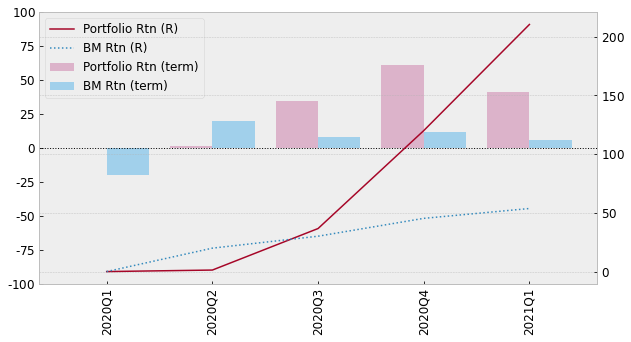

In [9]:
#PBR (Price to Book Value)
#Strategy: Trade Top 30 Low PBR stocks
#Presume to trade PBR ≥ 0.1
#Shareholders equity, shares, BPS, PBR
#BPS = Shareholders equity / Shares
#PBR = Price / BPS

terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')

data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)   # 0.1≤PBR≤2
    signal[t] = list(s[t].index)                                              

#Backtesting
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)
fs.draw_return(df)

In [10]:
signal['2020Q3']

['LXU',
 'TNP',
 'HNRG',
 'REI',
 'GNW',
 'APWC',
 'SMHI',
 'CRESY',
 'AR',
 'NBR',
 'TUSK',
 'PEI',
 'FSTX',
 'BHF',
 'BBGI',
 'FET',
 'HGSH',
 'CDR',
 'XYF',
 'CPE',
 'APTS',
 'TCOM',
 'GLOP',
 'WPG',
 'SND',
 'YPF',
 'XIN',
 'SALM',
 'QD',
 'MHLD']

CAGR: 559.97%
Accumulated return: 559.97%
Investment period: 1.0yrs
Sharpe ratio: 7.46
MDD: 0.00%


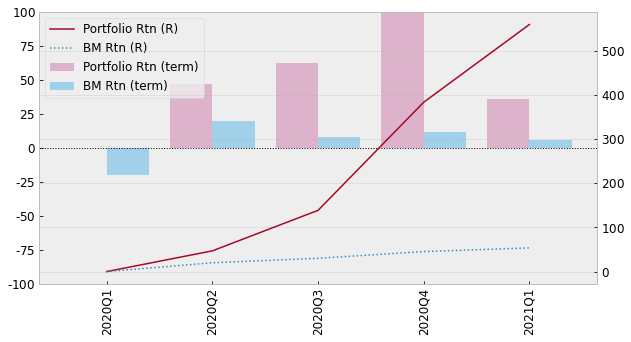

In [11]:
#PBR (change m=2 to m=3)
#Strategy: Trade Top 30 Low PBR stocks
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)
# m=3 has a better CAGR, return, and SR
# But not for every cases

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 344.54%
Accumulated return: 344.54%
Investment period: 1.0yrs
Sharpe ratio: 6.10
MDD: 0.00%


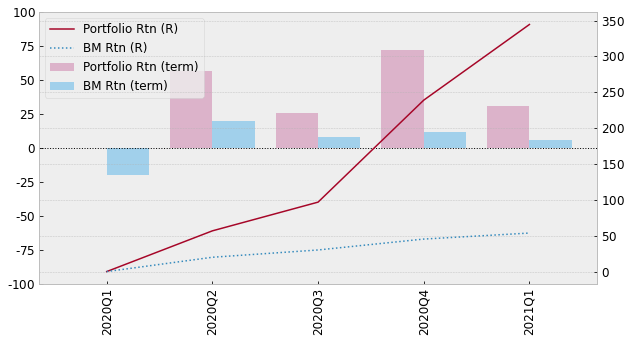

In [12]:
#PSR (Price to Sales Ratio)
#Strategy: Trade Top 30 Low PSR stocks
#Use Price_M3 instead of Price
#Shareholders equity, shares, BPS, PBR
#BPS = Shareholders equity / Shares
#PBR = Price / BPS

terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')

data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)   # 0.1≤PSR≤10
    signal[t] = list(s[t].index)                                              

#Backtesting
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 32.77%
Accumulated return: 1605.69%
Investment period: 10.0yrs
Sharpe ratio: 4.29
MDD: -35.17%


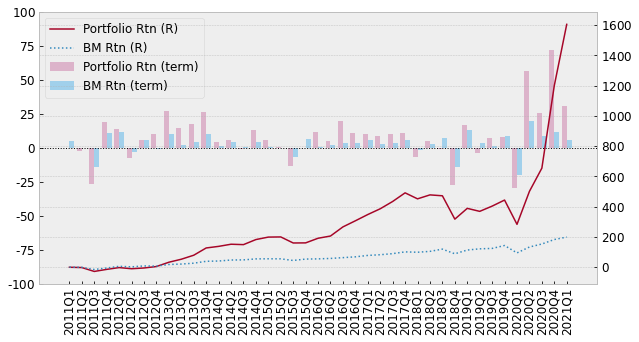

In [13]:
#PSR (Price to Sales Ratio)
#Strategy: Trade Top 30 Low PSR stocks
#Change trading duration from 1 year to 10 years

terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')

data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)                                              

#Backtesting
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

# CAGR is high, but MDD is too high

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 15.81%
Accumulated return: 334.34%
Investment period: 10.0yrs
Sharpe ratio: 0.77
MDD: -53.77%


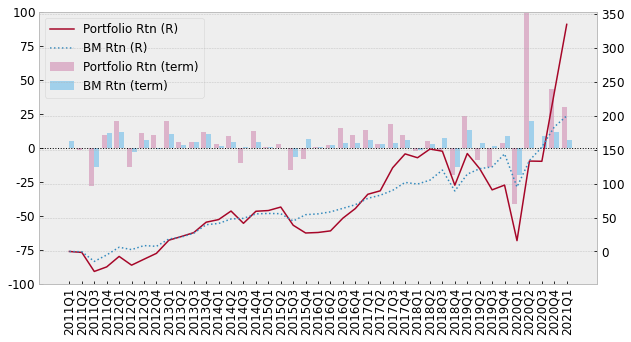

In [14]:
#PCR (Price to Cash Flow Ratio)
#Strategy: Trade Top 30 Low PCR stocks
#CFPS, Net Income, Depreciation, Shares, PCR
#CFPS = (Net Income + Depreciation) / Shares
#PCR = Price / CFPS

terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')

data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = (data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=30, asc=True)   # 0.1≤PCR≤10
    signal[t] = list(s[t].index)                                              

#Backtesting
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 25.82%
Accumulated return: 895.78%
Investment period: 10.0yrs
Sharpe ratio: 1.72
MDD: -44.38%


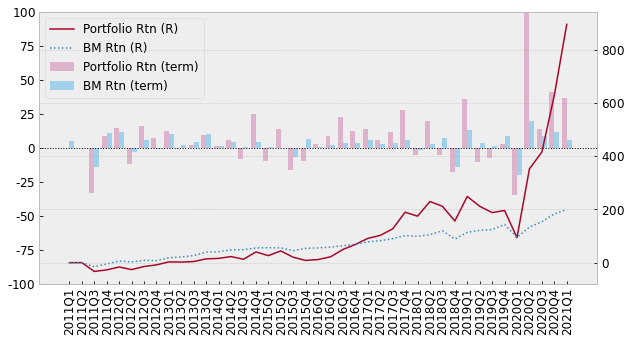

In [15]:
#PCR (Price to Cash Flow Ratio)
#Same Strategy: Trade Top 30 Low PCR stocks
# Change n=30 to n=10

terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')

data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = (data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=10, asc=True)
    signal[t] = list(s[t].index)                                              

#Backtesting
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

# Return and SR improved

In [18]:
#Combine (And)
t = '2021Q3'
data = fs.fn_consolidated(otp=otp, term=t, vol=0)
data['PER'] = data['Price_M3'] / data['EPS']
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity']/data['Shares'])
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=10, asc=True)
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=10, asc=True)
fs.combine_signal(s1,s2,how='and')

2021Q3...OK


,PER,PBR
symbol,,
QD,1.21,0.13


In [19]:
#Combine (Or)
fs.combine_signal(s1,s2,how='or')

,PER,PBR
symbol,,
AEI,NaN,0.15
ASTL,1.14,NaN
COHN,1.20,NaN
GASS,NaN,0.14
GNW,NaN,0.13
ICD,NaN,0.10
LBTYA,1.31,NaN
LBTYK,1.36,NaN
MFG,1.10,NaN


2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 11.43%
Accumulated return: 195.51%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -48.92%


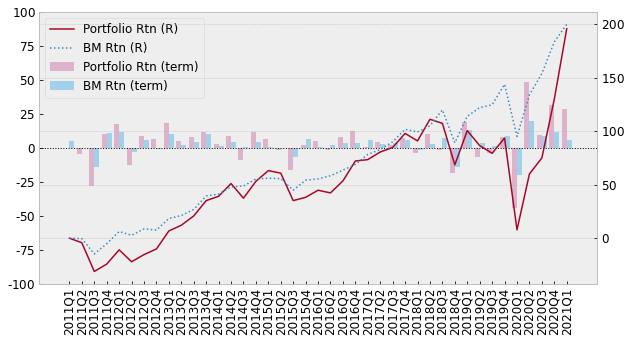

In [20]:
#Small Market cap + PER + PBR + PSR + PCR

#method='relative'
#method='absolute'

terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s  = {}
signal = {}

for t in terms:  
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )

    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
  
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 5.22%
Accumulated return: 66.36%
Investment period: 10.0yrs
Sharpe ratio: 0.27
MDD: -47.39%


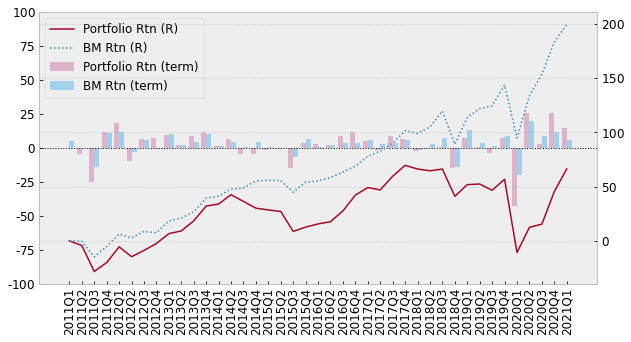

In [21]:
#Large Market cap + PER + PBR + PSR + PCR

terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=otp, term=t)

s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s  = {}
signal = {}

for t in terms:  
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )

    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=False)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
  
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

# "The Cross-Section of Expected Stock Returns" studied that Small market cap stock has a higher return than the large one. Low PBR stock has a higher return than the high PBR stock.
# PER+PBR+PSR+PCR: strong strategy but exceptional during covid drop (2020 March) Then is this a good overall strategy?

CAGR: 9.03%
Accumulated return: 137.61%
Investment period: 10.0yrs
Sharpe ratio: 0.45
MDD: -51.88%


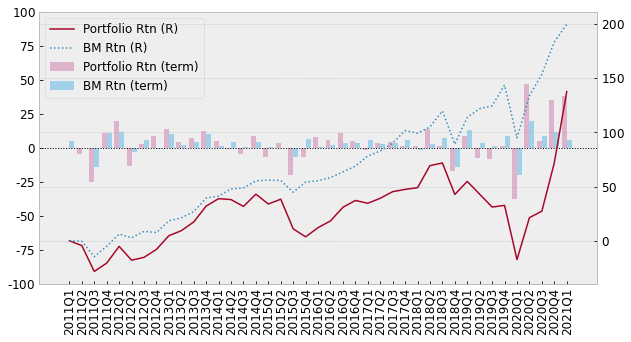

In [23]:
#EV/EBITDA

#EV (Enterprise Value) = Market cap + Long Term Debt + Current Debt - Cash & Equivalents
#EBITDA (Earnings Before Interest, Tax and Depreciation and Amortization)
# data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')
    # If  data[t]['EV']<=0) OR data[t]['EBITDA']<=0, let EV/EBITDA be NaN (ZERO)
#The lower, the better

# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp=otp, term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

CAGR: 25.28%
Accumulated return: 853.84%
Investment period: 10.0yrs
Sharpe ratio: 2.66
MDD: -26.06%


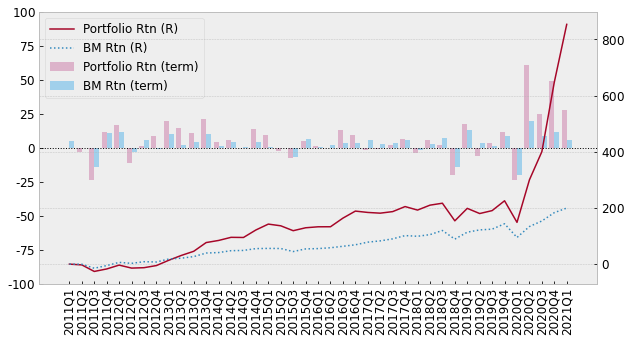

In [24]:
#EV/Sales

#EV (Enterprise Value) = Market cap + Long Term Debt + Current Debt - Cash & Equivalents
#EV/Sales = EV/Revenue
#The lower, the better

# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp=otp, term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['Revenue']<=0), 'EV/Sales'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

#EV/Sales strategy shows a better result than EV/EBITDA

CAGR: 25.40%
Accumulated return: 863.71%
Investment period: 10.0yrs
Sharpe ratio: 2.44
MDD: -6.53%


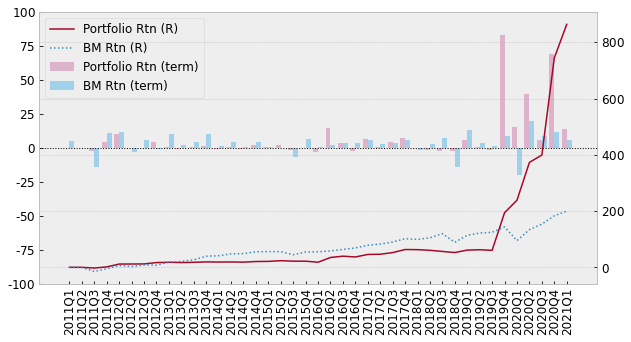

In [25]:
# Safety Margin (NCAV by benjamin graham)

#NCAV = Current Assets - Total Liabilities
#Safety = NCAV - Market Cap * 1.5
#The larger NCAV is, the better.


# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms: 
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [26]:
#Quaterly selected items are saved in 'signal' dictionary
#Print key and count values in dictionary

for k, v in signal.items():
  print(k, len(v))

2010Q4 0
2011Q1 3
2011Q2 6
2011Q3 6
2011Q4 3
2012Q1 7
2012Q2 5
2012Q3 5
2012Q4 2
2013Q1 2
2013Q2 3
2013Q3 1
2013Q4 1
2014Q1 2
2014Q2 5
2014Q3 3
2014Q4 4
2015Q1 5
2015Q2 3
2015Q3 4
2015Q4 6
2016Q1 5
2016Q2 4
2016Q3 6
2016Q4 3
2017Q1 7
2017Q2 5
2017Q3 3
2017Q4 2
2018Q1 4
2018Q2 4
2018Q3 7
2018Q4 9
2019Q1 8
2019Q2 10
2019Q3 10
2019Q4 23
2020Q1 12
2020Q2 24
2020Q3 14
2020Q4 10


CAGR: 4.37%
Accumulated return: 53.38%
Investment period: 10.0yrs
Sharpe ratio: 0.26
MDD: -39.83%


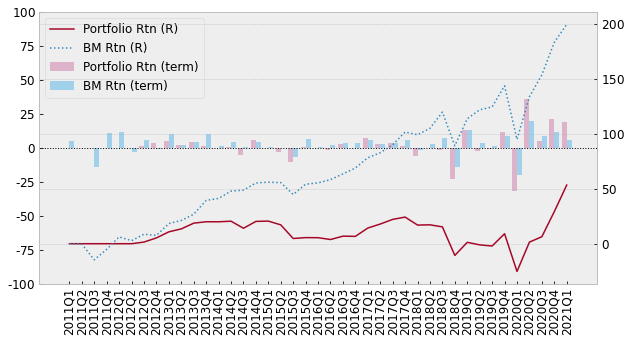

In [28]:
#PEG (Price Earning Growth Rate)
#PEG<1 = Undervalued stocks
#Buy when PEG<0.5, Sell when PEG>1.5 (Peter Lynch)
#Low PEG TOP30
#EPS Growth = (New EPS - Old EPS) / Old EPS * 100(%)
  #Old EPS = df['EPS'].shirt(4)
#PEG = PER / EPS growth


#terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
#data = {}
#for t in terms:
#    data[t] = fs.fn_consolidated(otp=otp, term=t) 
s = {}
signal = {}
for t in terms:
    t_4 = fs.quarters_before(terms, t, 4)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['EPS Growth'] = ( data[t]['EPS'] - data[t_4]['EPS'] ) / abs(data[t_4]['EPS'])
    data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth']
    data[t].loc[(data[t]['PER']<=0) | (data[t]['EPS Growth']<=0), 'PEG'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)
